# Implementation of ANN using keras

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print(f"Tensforflow version {tf.__version__}")
#print(f"Keras version {tf.keras.__version__}")

Tensforflow version 2.15.0


In [3]:
os.getcwd()

'C:\\Users\\KeerthanaMerugu\\Python\\DL_models'

# creating a simple classifier using keras on mnist data/

In [4]:
mnist = tf.keras.datasets.mnist  #handwritten digits

In [5]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\KeerthanaMerugu\\anaconda3\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [6]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [7]:
X_train_full.shape,y_train_full.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

- create a validation dataset from the full training data
- scale the data between 0 to 1 by divifding it by 255, as its unsigned data between 0-255 range

In [40]:
X_valid,X_train = X_train_full[0:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train = y_train_full[0:5000]/255.,y_train_full[5000:]/255.

In [41]:
# train- 55000
# test - 10000
#validation - 5000

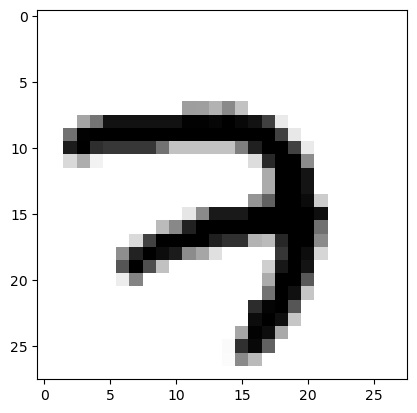

In [42]:
plt.imshow(X_train[0],cmap='binary')
plt.show()

<Axes: >

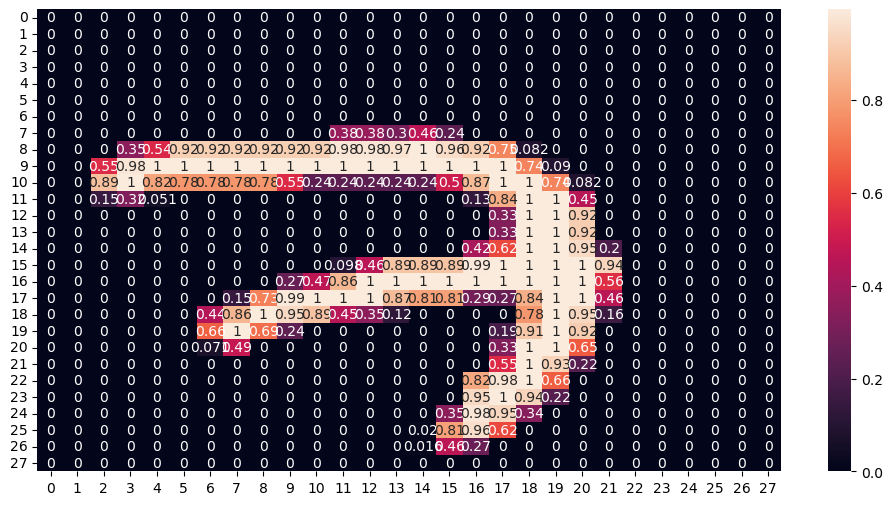

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(X_train[0],annot=True)#, cmap='binary')

# creating layers of ANN

In [44]:
layers = [tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
         tf.keras.layers.Dense(300,activation='relu',name='hiddenLayer1'),
         tf.keras.layers.Dense(100,activation='relu',name='hiddenLayer2'),
         tf.keras.layers.Dense(10,activation='softmax',name='outputLayer')]

In [45]:
model_clf = tf.keras.models.Sequential(layers)

In [46]:
model_clf.layers

In [47]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# total parameters to be trained
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [49]:
hidden1.get_weights()[0].shape

(784, 300)

In [50]:
hidden1.get_weights()[1].shape

(300,)

In [51]:
weights,biases = hidden1.get_weights()

In [52]:
weights.shape

(784, 300)

In [53]:
biases.shape

(300,)

In [54]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [55]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0153 - accuracy: 0.0989 - val_loss: 6.0669e-04 - val_accuracy: 0.0958
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 4.3665e-04 - accuracy: 0.0990 - val_loss: 2.8036e-04 - val_accuracy: 0.0958
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 2.4348e-04 - accuracy: 0.0990 - val_loss: 1.7881e-04 - val_accuracy: 0.0958
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 1.6799e-04 - accuracy: 0.0990 - val_loss: 1.3008e-04 - val_accuracy: 0.0958
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 1.2777e-04 - accuracy: 0.0990 - val_loss: 1.0166e-04 - val_accuracy: 0.0958
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0284e-04 - accuracy: 0.0990 - val_loss: 8.3118e-05 - val_accuracy: 0.0958
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 8.5910e-05 - acc

In [56]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [57]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.015309,0.098873,0.000607,0.0958
1,0.000437,0.098982,0.000280,0.0958
2,0.000243,0.098982,0.000179,0.0958
3,0.000168,0.098982,0.000130,0.0958
4,0.000128,0.098982,0.000102,0.0958
5,0.000103,0.098982,0.000083,0.0958
6,0.000086,0.098982,0.000070,0.0958
7,0.000074,0.098982,0.000061,0.0958
8,0.000064,0.098982,0.000053,0.0958
9,0.000057,0.098982,0.000047,0.0958


<Axes: >

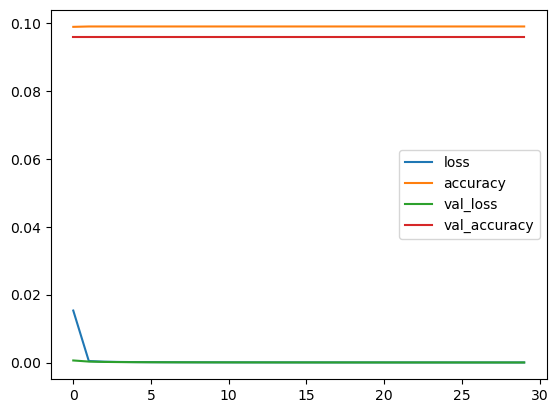

In [58]:
pd.DataFrame(history.history).plot()

In [59]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 4431.4854 - accuracy: 0.0980


[4431.4853515625, 0.09799999743700027]

In [60]:
x_new = X_test[:3]

In [61]:
actual=y_test[:3]

In [62]:
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

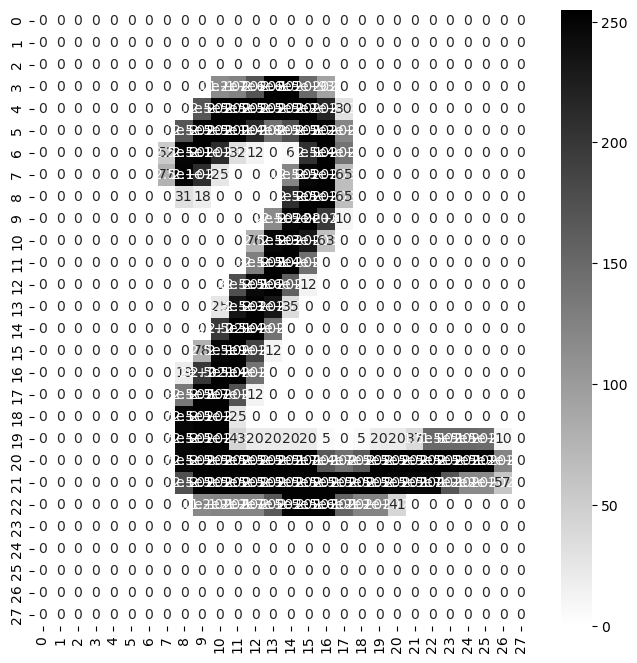

In [63]:
plt.figure(figsize=(8,8))
sns.heatmap(x_new[1],annot=True,cmap='binary')

In [64]:
y_prob=model_clf.predict(x_new)

1/1 [==============================] - 0s 41ms/step


In [65]:
y_prob.round(3)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [66]:
y_prob

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [67]:
y_pred = np.argmax(y_prob, axis = -1)

In [68]:
y_pred

array([0, 0, 0], dtype=int64)

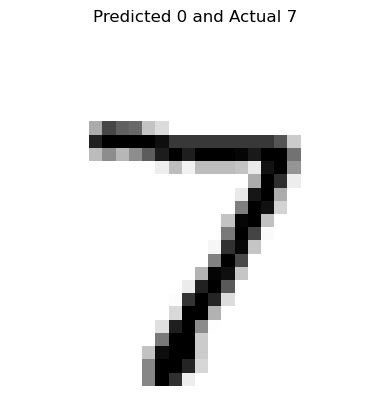

######################


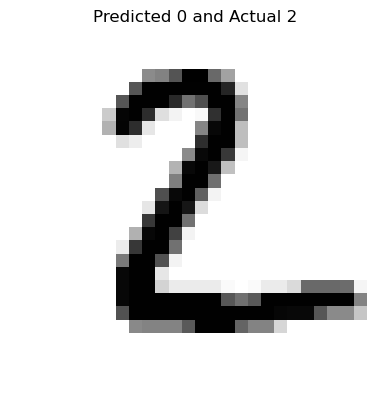

######################


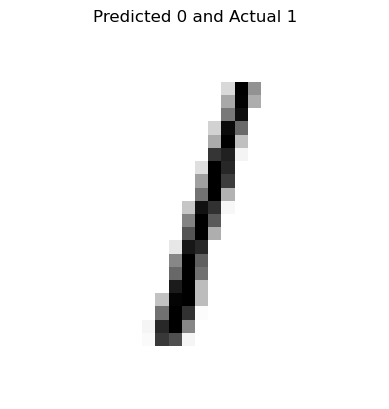

######################


In [69]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show() 
  print("######################")

# early stopping callback

In [70]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5)